### Module 7:  Supervised Learning-1

#### Case Study–1

#### Objectives:

• Fit a model using binary classification using logistic regression.

• Identify correlated variables and form a less complex model.

Questions:
1. We will use acoustic features to distinguish a male voice from a female. Load
the dataset from “voice.csv”, identify the target variable and do a one-hot
encoding for the same. Split the dataset into train-test with 20% of the data
kept aside for testing.
[Hint: Refer to LabelEncoder documentation in scikit-learn]


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
df = pd.read_csv("voice.csv")

# Step 2: Identify the target variable
# Usually the target column is named 'label' (male/female)
target = 'label'

# Step 3: One-hot encoding (using LabelEncoder for binary classification)
le = LabelEncoder()
df[target] = le.fit_transform(df[target])  
# male → 1, female → 0 (or vice versa depending on fit order)

# Step 4: Split features (X) and target (y)
X = df.drop(columns=[target])
y = df[target]

# Step 5: Train-test split (20% test size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Encoded target classes:", le.classes_)


Training set shape: (2534, 20)
Testing set shape: (634, 20)
Encoded target classes: ['female' 'male']


#### 2. Fit a logistic regression model and measure the accuracy of the test set.
[Hint: Refer to Linear Models section in scikit-learn]


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Encode target variable (label: male/female)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # female=0, male=1 (order may vary)

# Split features and target
X = df.drop(columns=['label'])
y = df['label']

# Fit Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # increase iterations for convergence
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)


Test set accuracy: 0.9132492113564669


#### 3. Compute the correlation matrix that describes the dependence between all predictors and identifies the highly correlated predictors. Plot the correlation matrix using a seaborn heatmap.
[Hint: Explore dataframe methods to identify appropriate methods]


Correlation Matrix:

Highly correlated predictors (|corr| > 0.8):
median and meanfreq: 0.93
Q25 and meanfreq: 0.91
Q25 and sd: -0.85
IQR and sd: 0.87
IQR and Q25: -0.87
kurt and skew: 0.98
sfm and sd: 0.84
sfm and sp.ent: 0.87
centroid and meanfreq: 1.00
centroid and median: 0.93
centroid and Q25: 0.91
maxdom and meandom: 0.81
dfrange and meandom: 0.81
dfrange and maxdom: 1.00


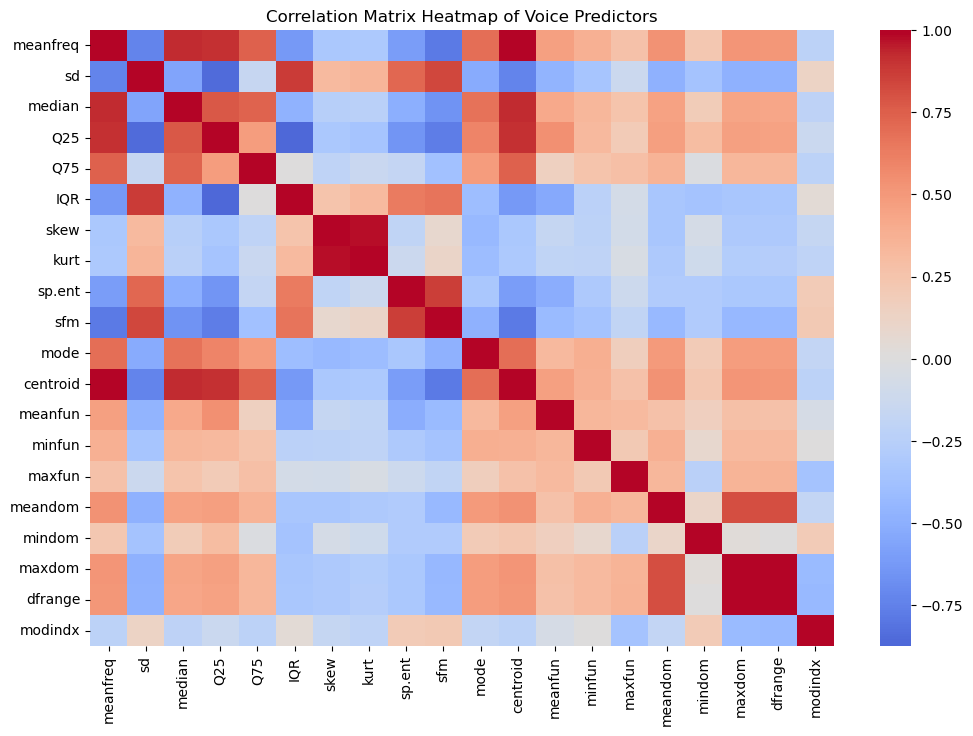

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop target column (label) to compute correlation only among predictors
predictors = df.drop(columns=['label'])

# Compute correlation matrix
corr_matrix = predictors.corr()

print("Correlation Matrix:")
corr_matrix

# Identify highly correlated predictors (absolute correlation > 0.8)
threshold = 0.8
print("\nHighly correlated predictors (|corr| > 0.8):")
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            print(f"{corr_matrix.columns[i]} and {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.2f}")

# Step 5: Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap of Voice Predictors")
plt.show()


#### 4. Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of the previous model.
[Hint: Identify correlated variable pairs and remove one among them]

In [5]:
# Separate predictors and target
X = df.drop(columns=['label'])
y = df['label']

# Compute correlation matrix
corr_matrix = X.corr().abs()

# Identify correlated pairs (threshold > 0.8)
threshold = 0.8
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[i]
            # Drop one of the correlated columns (here we drop the later one)
            to_drop.add(colname)

print("Dropping correlated predictors:", to_drop)

# Drop correlated predictors
X_reduced = X.drop(columns=list(to_drop))

# Train-test split
X_train_red, X_test_red, _, _ = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

# Fit logistic regression on full predictors
log_reg_full = LogisticRegression(max_iter=1000)
log_reg_full.fit(X_train, y_train)
y_pred_full = log_reg_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

# Fit logistic regression on reduced predictors
log_reg_red = LogisticRegression(max_iter=1000)
log_reg_red.fit(X_train_red, y_train)
y_pred_red = log_reg_red.predict(X_test_red)
acc_red = accuracy_score(y_test, y_pred_red)

#  Compare accuracies
print("Accuracy with all predictors:", acc_full)
print("Accuracy after removing correlated predictors:", acc_red)


Dropping correlated predictors: {'kurt', 'sfm', 'dfrange', 'IQR', 'Q25', 'maxdom', 'median', 'centroid'}
Accuracy with all predictors: 0.9132492113564669
Accuracy after removing correlated predictors: 0.9132492113564669
